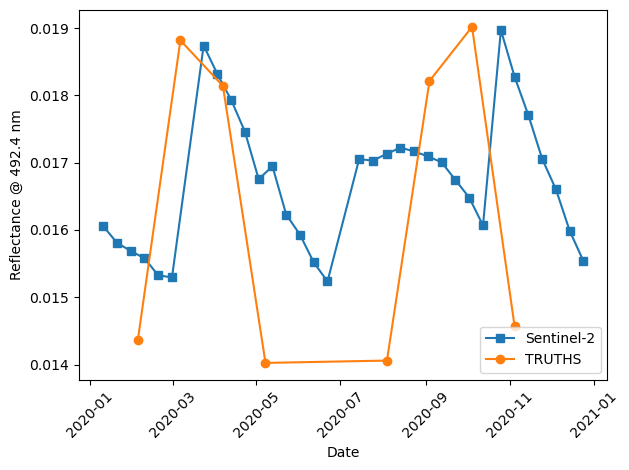

In [3]:
import pandas as pd
df = pd.read_csv('/home/users/ndouglas/TRUTHS/albedos/geometries/LAT0.0LON-60.0_geometries.csv')
t_truths=pd.read_csv('/home/users/ndouglas/TRUTHS/datetimes/TRUTHS/TRUTHSdatetimesLAT0.0LON-60.0',header=None)[0]
#t_truths = pd.read_csv("truths_times", header=None)[0]
t_truths = pd.to_datetime(t_truths, errors="raise")
t_s2=pd.read_csv('/home/users/ndouglas/TRUTHS/datetimes/Sentinel2/Sentinel2datetimesLAT0.0LON-60.0',header=None)[0]
t_s2 = pd.to_datetime(t_s2, errors="raise")
wl_cols = ["492.4","560.0","665.0","704.0","740.0","783.0","842.0","865.0","945.0","1610.0","2190.0"]
hxbar_Sentinel=np.load('hxbar_Sentinel.npy')
hxbar_TRUTHS=np.load('hxbar_TRUTHS.npy')
m_truths = df["mission"].astype(str).str.strip().eq("TRUTHS")
m_s2     = df["mission"].astype(str).str.strip().eq("Sentinel2")
n_wl = len(wl_cols)
n_truths = int(m_truths.sum())
n_s2 = int(m_s2.sum())
df.loc[m_truths, wl_cols] = hxbar_TRUTHS.reshape(n_wl, n_truths).T
df.loc[m_s2, wl_cols]     = hxbar_Sentinel.reshape(n_wl, n_s2).T
df["datetime"] = pd.NaT
df.loc[m_truths, "datetime"] = t_truths.to_numpy()
df.loc[m_s2,"datetime"] = t_s2.to_numpy()
#plt.plot(hxbar_Sentinel[0:33])

wl_col="492.4"
d = df[["datetime", "mission", wl_col]].dropna(subset=["datetime", wl_col]).copy()

d_truths = d[d["mission"].astype(str).str.strip().eq("TRUTHS")].copy()
d_s2     = d[d["mission"].astype(str).str.strip().eq("Sentinel2")].copy()

# Sort so the time series is correctly ordered
d_truths.sort_values("datetime", inplace=True)
d_s2.sort_values("datetime", inplace=True)

# Plot
plt.figure()
plt.plot(d_s2["datetime"], d_s2[wl_col], marker="s", linestyle="-", label="Sentinel-2")
plt.plot(d_truths["datetime"], d_truths[wl_col], marker="o", linestyle="-", label="TRUTHS")

plt.xlabel("Date")
plt.ylabel(f"Reflectance @ {wl_col} nm")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()